In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [74]:
# graph styles
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'figure.facecolor': 'white',
    'font.size': 12.0,
    'axes.facecolor': 'white',
    'axes.edgecolor': 'white',
    'axes.linewidth': '1',
    'axes.grid': True,
    'grid.color': '#b7b7b7',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#64aad4', '#275876', '#ec866c', '#8bccc9', '#f9d669', '#EBA239']),
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'axes.labelweight': 'medium',
    'axes.spines.left': False,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.facecolor': '#FFFFFF',
    'font.family': 'Gulim',
})


In [17]:
df = pd.read_csv('data/air-quality-measures.csv')
df.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1097,Mobile,1999,32.0,No Units,No Units,Monitor Only,1


In [18]:
annual_average = df[df.UnitName=="Micograms per cubic meter"]

In [19]:
annual_average_utah = annual_average[annual_average.StateName=="Utah"]

IndexError: pop from empty list

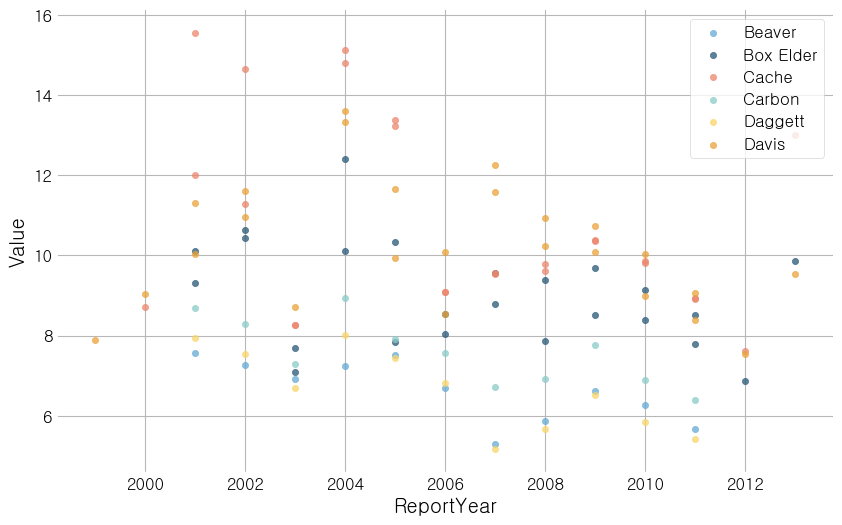

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))

# Don't touch this part of the code!
colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

groups = annual_average_utah.groupby('CountyName')
for name, group in groups:
    group.plot(kind='scatter', x='ReportYear', y='Value', color=colors.pop(), label=name, ax=ax, alpha=0.75)
ax.legend_.remove()

ax.grid(False, axis='x')
ax.set_title("Utah Air Quality, by county", pad=20)
ax.title.set_fontsize(16)
ax.set_xlabel("Year")
ax.set_ylabel("Particle count")

# plt.savefig("graph-scatter.pdf")
# plt.show()

/Users/Veronica/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0,0.5,'Particle count')

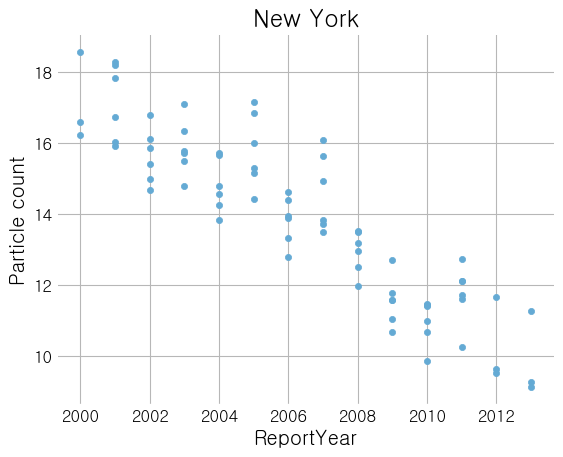

In [78]:
new_york = annual_average[annual_average.StateName=='New York']
nyc = new_york[new_york.CountyName.str.contains("Bronx") | annual_average.CountyName.str.contains("Kings$") | annual_average.CountyName.str.contains("New York")].sort_values(by='ReportYear')
ax = nyc.plot(x='ReportYear', y='Value', kind='scatter')
ax.set_title('New York')
ax.set_ylabel('Particle count')

In [43]:
new_york

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
43831,87,Annual average ambient concentrations of PM2.5...,Average,State x County,6,California,6031,Kings,2000,16.365189,µg/m³,Micograms per cubic meter,Monitor Only,1
41545,87,Annual average ambient concentrations of PM2.5...,Average,State x County,36,New York,36005,Bronx,2000,16.617667,µg/m³,Micograms per cubic meter,Monitor Only,1
47475,87,Annual average ambient concentrations of PM2.5...,Average,State x County,36,New York,36061,New York,2000,18.587876,µg/m³,Micograms per cubic meter,Monitor Only,1
45984,87,Annual average ambient concentrations of PM2.5...,Average,State x County,36,New York,36047,Kings,2000,16.247750,µg/m³,Micograms per cubic meter,Monitor Only,1
204193,296,Annual average ambient concentrations of PM 2....,Average,State x County,36,New York,36005,Bronx,2001,16.752730,µg/m³,Micograms per cubic meter,Monitor Only,1
204501,296,Annual average ambient concentrations of PM 2....,Average,State x County,36,New York,36061,New York,2001,18.291328,µg/m³,Micograms per cubic meter,Monitor Only,1
43156,87,Annual average ambient concentrations of PM2.5...,Average,State x County,6,California,6031,Kings,2001,19.179613,µg/m³,Micograms per cubic meter,Monitor Only,1
41025,87,Annual average ambient concentrations of PM2.5...,Average,State x County,36,New York,36061,New York,2001,18.223861,µg/m³,Micograms per cubic meter,Monitor Only,1
186327,296,Annual average ambient concentrations of PM 2....,Average,State x County,6,California,6031,Kings,2001,18.035538,µg/m³,Micograms per cubic meter,Monitor Only,1
39942,87,Annual average ambient concentrations of PM2.5...,Average,State x County,36,New York,36047,Kings,2001,16.038833,µg/m³,Micograms per cubic meter,Monitor Only,1


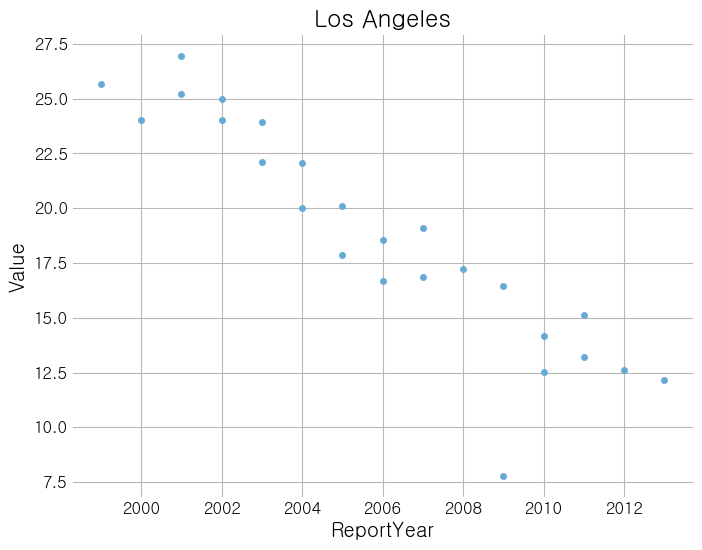

In [79]:
# Los Angeles readings, chronological
los_angeles = annual_average[annual_average.CountyName=='Los Angeles'].sort_values(by='ReportYear')
result = los_angeles
ax = los_angeles.plot(x='ReportYear',y='Value', kind='scatter', figsize=(8,6))
ax.set_title('Los Angeles')
ax.grid(True)

Text(0,0.5,'Particle count')

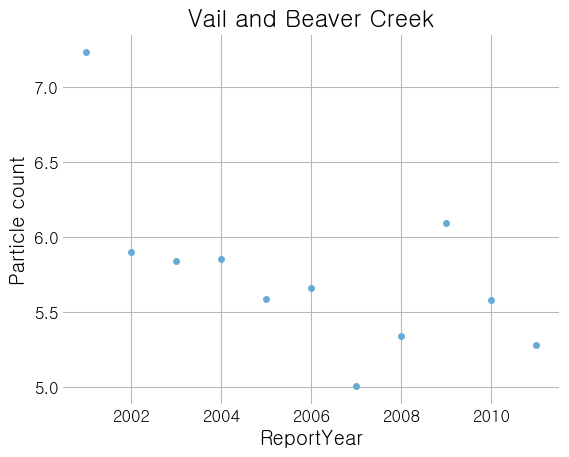

In [81]:
# Vail and Beaver Creek, CO - chronological
eagle = annual_average[annual_average.CountyName=='Eagle'].sort_values(by='ReportYear')
ax = eagle.plot(x='ReportYear', y='Value', kind='scatter')
ax.set_title('Vail and Beaver Creek')
ax.set_ylabel('Particle count')

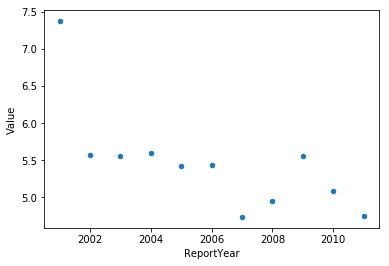

In [55]:
colorado = annual_average[annual_average.StateName=='Colorado']
summit = colorado[colorado.CountyName=='Summit'].sort_values(by='ReportYear')
summit.plot(x='ReportYear', y='Value', kind='scatter')

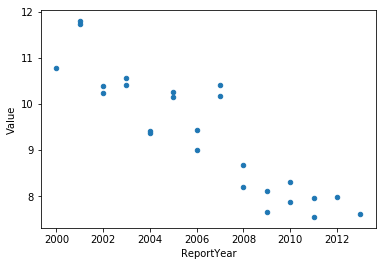

In [56]:
denver = colorado[colorado.CountyName=='Denver'].sort_values(by='ReportYear')
denver.plot(x='ReportYear', y='Value', kind='scatter')

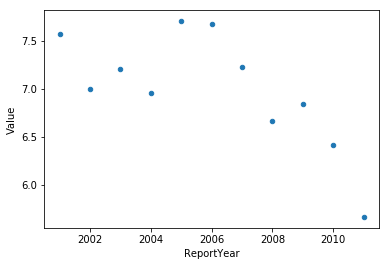

In [59]:
montana = annual_average[annual_average.StateName=='Montana']
blue_sky = montana[montana.CountyName=='Madison']
blue_sky.plot(x='ReportYear', y='Value', kind='scatter')

Text(0,0.5,'Particle count')

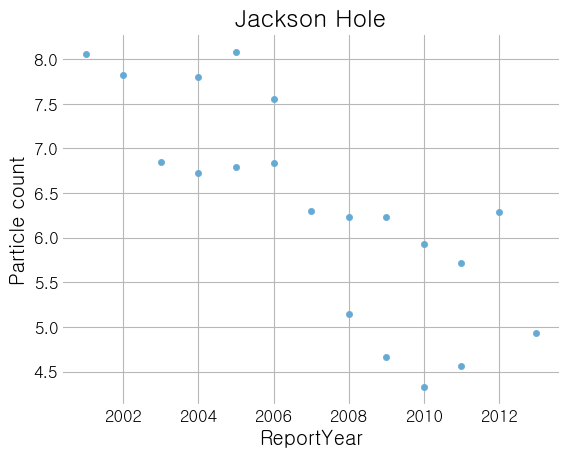

In [84]:
wyoming = annual_average[annual_average.StateName=='Wyoming']
jackson = wyoming[wyoming.CountyName=='Teton']
ax = jackson.plot(x='ReportYear', y='Value', kind='scatter')
ax.set_title('Jackson Hole')
ax.set_ylabel('Particle count')